# Taxonomic Analysis 
This notebook contains all the taxonomic analysis performed after obtaining the data and selected the samples


## Libraries import and data reading

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tax = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/99_otu_taxonomy.txt', sep='\t', header=None, dtype={'id':'str'})
otus = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/otu_match.tsv', sep='\t', index_col=0)

In [ ]:
meta = pd.read_csv('drive/MyDrive/Bioscienze/Progetto/Data/sample_metadata.tsv', sep='\t')

In [ ]:
meta = meta.rename(columns={'sample-id': 'id'})

In [ ]:
meta

,id,sex,age_cat,refined_sugars
0,10317.000001166.25853,female,40s,No
1,10317.000003100.69016,female,40s,No
2,10317.000004936.25853,male,50s,No
3,10317.000010862.25853,male,20s,No
4,10317.000012018.56079,female,50s,No
...,...,...,...,...
354,10317.000109791.74729,male,20s,Yes
355,10317.000109807.76952,female,40s,Yes
356,10317.000110177.74729,male,30s,Yes
357,10317.000112912.76952,female,50s,Yes


In [ ]:
tax = tax.rename(columns={0:"id", 1:"bacteria"})
tax.head(5)

,id,bacteria
0,228054,k__Bacteria; p__Cyanobacteria; c__Synechococco...
1,228057,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
2,73627,k__Bacteria; p__Actinobacteria; c__Actinobacte...
3,378462,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
4,89370,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...


In [ ]:
otus

,2941399,4425663,353737,363646,1090458,922239,845273,185021,293665,4453060,...,213762,179905,4324040,333726,199147,1808779,173916,435264,325586,4307347
10317.000001166.25853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000003100.69016,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000010862.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000012018.56079,0.0,64.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109791.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000109807.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000110177.74729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

otus_t = otus.T

In [ ]:
otus_t

,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,10317.000022184.26478,...,10317.000108496.74729,10317.000108903.74729,10317.000108906.74729,10317.000109022.74729,10317.000109095.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168
2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,8.0,...,3.0,0.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
otus_t = otus_t.reset_index()

In [ ]:
otus_t = otus_t.rename(columns={'index':'id'})

In [ ]:
tax.id = tax.id.astype(str)

In [ ]:
otus_tax = pd.merge(otus_t, tax, on='id')

In [ ]:
otus_tax

,id,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,...,10317.000108903.74729,10317.000108906.74729,10317.000109022.74729,10317.000109095.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168,bacteria
0,2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Synergistetes; c__Synergistia;...
1,4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,...,0.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
2,353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
3,363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
4,1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__Actinobacte...
6900,173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
6901,435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
6902,325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...


Lets now split the taxonomy in different features, one for each taxonomy level:

In [ ]:
def split_tax(s):
  t = s.split(';')
  return t

In [ ]:
res = otus_tax['bacteria'].apply(split_tax)

In [ ]:
taxa_filt = pd.DataFrame(res.to_list(),columns=['kingdom','phylum','class','order','family','genus','species']) 

In [ ]:
taxa_filt

,kingdom,phylum,class,order,family,genus,species
0,k__Bacteria,p__Synergistetes,c__Synergistia,o__Synergistales,f__Synergistaceae,g__Synergistes,s__
1,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
2,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
3,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
4,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,s__
...,...,...,...,...,...,...,...
6899,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Nocardioidaceae,g__,s__
6900,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
6901,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Porphyromonas,s__
6902,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__


Some indications on how diverse the taxonomy is:

In [ ]:
taxa_filt.kingdom.value_counts()/6904

k__Bacteria    0.998552
k__Archaea     0.001448
Name: kingdom, dtype: float64

In [ ]:
taxa_filt.phylum.value_counts()/6904

 p__Firmicutes          0.661501
 p__Proteobacteria      0.142092
 p__Bacteroidetes       0.116309
 p__Actinobacteria      0.049247
 p__Tenericutes         0.009994
 p__Cyanobacteria       0.005504
 p__Fusobacteria        0.004200
 p__Verrucomicrobia     0.002028
 p__[Thermi]            0.001304
 p__Lentisphaerae       0.001304
 p__Euryarchaeota       0.001304
 p__Synergistetes       0.001014
 p__Spirochaetes        0.000869
 p__TM7                 0.000579
 p__Chloroflexi         0.000579
 p__Acidobacteria       0.000579
 p__WPS-2               0.000290
 p__Deferribacteres     0.000290
 p__SR1                 0.000290
 p__Planctomycetes      0.000290
 p__Nitrospirae         0.000145
 p__Crenarchaeota       0.000145
 p__Gemmatimonadetes    0.000145
Name: phylum, dtype: float64

In [ ]:
taxa_filt["class"].value_counts()/6904

 c__Clostridia               0.566338
 c__Bacteroidia              0.104577
 c__Bacilli                  0.083140
 c__Gammaproteobacteria      0.075319
 c__Actinobacteria           0.035921
 c__Betaproteobacteria       0.035197
 c__Alphaproteobacteria      0.025203
 c__Erysipelotrichi          0.012022
 c__Coriobacteriia           0.011877
 c__Mollicutes               0.009705
 c__Flavobacteriia           0.006952
 c__Fusobacteriia            0.004200
 c__Deltaproteobacteria      0.004056
 c__4C0d-2                   0.003187
 c__Sphingobacteriia         0.002462
 c__Epsilonproteobacteria    0.002317
 c__Chloroplast              0.001883
 c__Verrucomicrobiae         0.001593
 c__[Saprospirae]            0.001448
 c__[Lentisphaeria]          0.001304
 c__Deinococci               0.001304
 c__Synergistia              0.001014
 c__Methanobacteria          0.000869
 c__Spirochaetes             0.000869
 c__Cytophagia               0.000869
 c__Thermoleophilia          0.000724
 c__        

In [ ]:
taxa_filt["order"].value_counts().loc[" o__"]/6904

0.0028968713789107765

In [ ]:
taxa_filt["genus"].value_counts().loc[" g__"]/6904

0.5118771726535342

In [ ]:
taxa_filt["species"].value_counts().loc[" s__"]/6904

0.897305909617613

Integration of the splitted taxonomy in the dataframe:

In [ ]:
otus_tax_s = pd.concat([otus_t,taxa_filt],axis = 1)

In [ ]:
otus_tax_s

,id,10317.000001166.25853,10317.000003100.69016,10317.000004936.25853,10317.000010862.25853,10317.000012018.56079,10317.000013727.69016,10317.000014885.41931,10317.000017272.30606,10317.000020655.26478,...,10317.000110177.74729,10317.000112912.76952,10317.000113026.81168,kingdom,phylum,class,order,family,genus,species
0,2941399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Synergistetes,c__Synergistia,o__Synergistales,f__Synergistaceae,g__Synergistes,s__
1,4425663,1.0,1.0,0.0,0.0,64.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
2,353737,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
3,363646,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__
4,1090458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__[Tissierellaceae],g__Anaerococcus,s__
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,1808779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Actinomycetales,f__Nocardioidaceae,g__,s__
6900,173916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__,g__,s__
6901,435264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Porphyromonas,s__
6902,325586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__,s__


In [ ]:
otus_tax_s.set_index('id',inplace=True)

## Aggregate groups analysis: 

In this section we are going to analyze all of our sample without considering the target variable 'refined sugars'

In [ ]:
otus_tax_s['class'].value_counts()

 c__Clostridia               3910
 c__Bacteroidia               722
 c__Bacilli                   574
 c__Gammaproteobacteria       520
 c__Actinobacteria            248
 c__Betaproteobacteria        243
 c__Alphaproteobacteria       174
 c__Erysipelotrichi            83
 c__Coriobacteriia             82
 c__Mollicutes                 67
 c__Flavobacteriia             48
 c__Fusobacteriia              29
 c__Deltaproteobacteria        28
 c__4C0d-2                     22
 c__Sphingobacteriia           17
 c__Epsilonproteobacteria      16
 c__Chloroplast                13
 c__Verrucomicrobiae           11
 c__[Saprospirae]              10
 c__[Lentisphaeria]             9
 c__Deinococci                  9
 c__Synergistia                 7
 c__Methanobacteria             6
 c__Spirochaetes                6
 c__Cytophagia                  6
 c__Thermoleophilia             5
 c__                            5
 c__TM7-3                       3
 c__Acidimicrobiia              3
 c__Thermoplas

In [ ]:
otus_tax_s['phylum'].value_counts()

 p__Firmicutes          4567
 p__Proteobacteria       981
 p__Bacteroidetes        803
 p__Actinobacteria       340
 p__Tenericutes           69
 p__Cyanobacteria         38
 p__Fusobacteria          29
 p__Verrucomicrobia       14
 p__[Thermi]               9
 p__Lentisphaerae          9
 p__Euryarchaeota          9
 p__Synergistetes          7
 p__Spirochaetes           6
 p__TM7                    4
 p__Chloroflexi            4
 p__Acidobacteria          4
 p__WPS-2                  2
 p__Deferribacteres        2
 p__SR1                    2
 p__Planctomycetes         2
 p__Nitrospirae            1
 p__Crenarchaeota          1
 p__Gemmatimonadetes       1
Name: phylum, dtype: int64

In [ ]:
(otus_tax_s['phylum'].value_counts()/otus_tax_s.shape[0])*100

 p__Firmicutes          66.150058
 p__Proteobacteria      14.209154
 p__Bacteroidetes       11.630939
 p__Actinobacteria       4.924681
 p__Tenericutes          0.999421
 p__Cyanobacteria        0.550406
 p__Fusobacteria         0.420046
 p__Verrucomicrobia      0.202781
 p__[Thermi]             0.130359
 p__Lentisphaerae        0.130359
 p__Euryarchaeota        0.130359
 p__Synergistetes        0.101390
 p__Spirochaetes         0.086906
 p__TM7                  0.057937
 p__Chloroflexi          0.057937
 p__Acidobacteria        0.057937
 p__WPS-2                0.028969
 p__Deferribacteres      0.028969
 p__SR1                  0.028969
 p__Planctomycetes       0.028969
 p__Nitrospirae          0.014484
 p__Crenarchaeota        0.014484
 p__Gemmatimonadetes     0.014484
Name: phylum, dtype: float64

Some histograms on the top phylum and classes in our sample:

In [ ]:
phyl = []
value = []
for val, cnt in otus_tax_s['phylum'].value_counts().iteritems():
     phyl.append(val)
     value.append(cnt/otus_tax_s.shape[0]*100)

phylum_data = pd.DataFrame.from_dict({'Phylum': phyl, 'Occurence %':value}) 

<ipython-input-26-cd8397c67aac>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for val, cnt in otus_tax_s['phylum'].value_counts().iteritems():


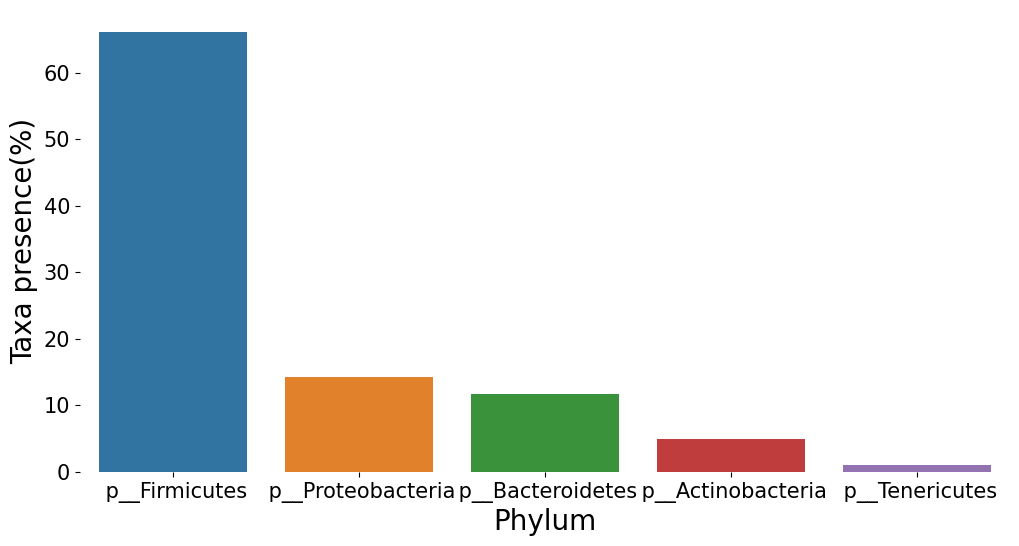

In [ ]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
plt.subplots(figsize=(12, 6)) 
# Create bars 
fig = sns.barplot(x=phylum_data['Phylum'][:5], y=phylum_data['Occurence %'][:5]) 
sns.despine(bottom = True, left = True) 
fig.set_xlabel("Phylum",fontsize=20) 
fig.tick_params(labelsize=15) 
fig.set_ylabel("Taxa presence(%)",fontsize=20) 
plt.savefig('phylum.pdf')

In [ ]:
clas = []
value = []
for val, cnt in otus_tax_s['class'].value_counts().iteritems():
     clas.append(val)
     value.append(cnt/otus_tax_s.shape[0]*100)

class_data = pd.DataFrame.from_dict({'Class': clas, 'Occurence':value}) 

<ipython-input-28-1cafa0714957>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for val, cnt in otus_tax_s['class'].value_counts().iteritems():


Text(0, 0.5, 'Taxa presence %')

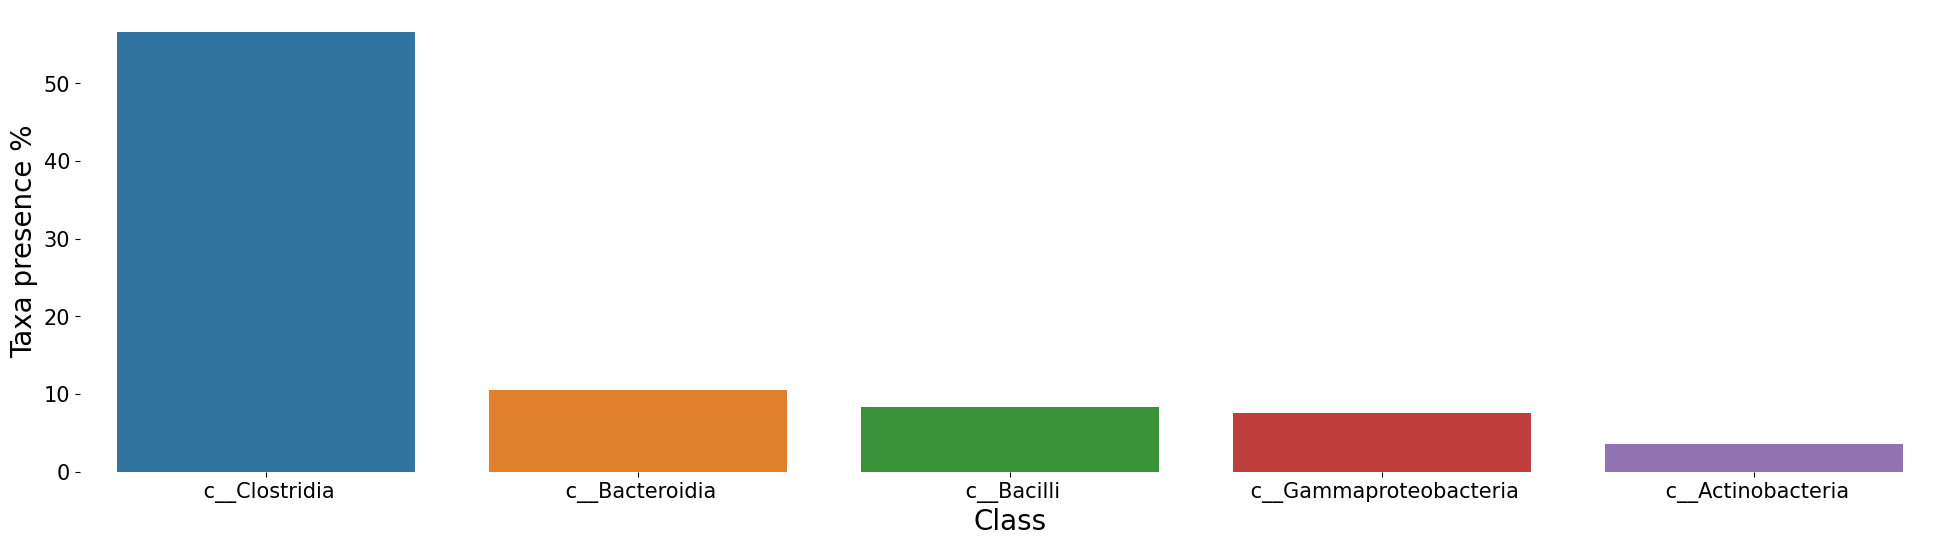

In [ ]:
# Print only top15 countries 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
 
plt.subplots(figsize=(24, 6)) 
# Create bars 
fig = sns.barplot(x=class_data['Class'][:5], y=class_data['Occurence'][:5]) 
sns.despine(bottom = True, left = True) 
fig.set_xlabel("Class",fontsize=20) 
fig.tick_params(labelsize=15) 
fig.set_ylabel("Taxa presence %",fontsize=20) 
#plt.savefig('animali.png')

In [ ]:
otus_t.set_index("id",inplace=True)

In [ ]:
total =  otus_t.sum()
total

10317.000001166.25853    34320.0
10317.000003100.69016    25450.0
10317.000003509.48742    15068.0
10317.000004057.42298    21989.0
10317.000004936.25853        5.0
                          ...   
10317.000110309.76952    21304.0
10317.000110416.76952    20434.0
10317.000112912.76952     1238.0
10317.000112984.81168    34835.0
10317.000113026.81168    24065.0
Length: 797, dtype: float64

## Separate groups analysis

In this section we are going to split the two groups using the 'refined sugar' column and analyze them 

Adding target column: Refined sugars

In [ ]:
otus_t.loc['refined_sugars'] = list(meta['refined_sugars'])

In [ ]:
otus_t

,10317.000001166.25853,10317.000003100.69016,10317.000003509.48742,10317.000004057.42298,10317.000004936.25853,10317.000010190.50470,10317.000010862.25853,10317.000010863.25853,10317.000012018.56079,10317.000012071.31503,...,10317.000109787.74729,10317.000109791.74729,10317.000109807.76952,10317.000110177.74729,10317.000110187.74729,10317.000110309.76952,10317.000110416.76952,10317.000112912.76952,10317.000112984.81168,10317.000113026.81168
id,,,,,,,,,,,,,,,,,,,,,
208901,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1117675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4341194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4468384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,1.0,...,2.0,0.0,36.0,73.0,6.0,1.0,0.0,0.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4368600,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,11.0,0.0,5.0,0.0,8.0,1.0,5.0,0.0,1.0,0.0


In [ ]:
otus_ref = otus_t.T

In [ ]:
otus_ref

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,182142,287755,2792167,1902400,188454,782984,214651,4368600,4463532,refined_sugars
10317.000001166.25853,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,No
10317.000003100.69016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,No
10317.000003509.48742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44.0,No
10317.000004057.42298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110309.76952,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
10317.000110416.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,Yes
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
10317.000112984.81168,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,112.0,Yes


Lets add another column that will cointain the row sum (sum of features for each sample):

In [ ]:
otus_ref['id_sum']= total

In [ ]:
otus_ref

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,287755,2792167,1902400,188454,782984,214651,4368600,4463532,refined_sugars,id_sum
10317.000001166.25853,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,No,34320.0
10317.000003100.69016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,No,25450.0
10317.000003509.48742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,44.0,No,15068.0
10317.000004057.42298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,21989.0
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110309.76952,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes,21304.0
10317.000110416.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,Yes,20434.0
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,1238.0
10317.000112984.81168,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,112.0,Yes,34835.0


In [ ]:
norm = otus_ref.iloc[:, :-2]

In [ ]:
norm = norm.apply(lambda x: x/otus_ref['id_sum'])

In [ ]:
norm['id_sum'] = otus_ref['id_sum']
norm['refined_sugars'] = otus_ref["refined_sugars"]

Now we are going to normalize the table dividing each cell for the corresponding id_sum, weighting the value of the feature in that sample for the total number of feature in each sample:

In [ ]:
norm

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,287755,2792167,1902400,188454,782984,214651,4368600,4463532,id_sum,refined_sugars
10317.000001166.25853,0.0,0.0,0.0,0.0,0.0,0.000117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.000087,34320.0,No
10317.000003100.69016,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000118,0.000196,25450.0,No
10317.000003509.48742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.00292,15068.0,No
10317.000004057.42298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21989.0,No
10317.000004936.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110309.76952,0.0,0.0,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000047,0.0,21304.0,Yes
10317.000110416.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000245,0.0,20434.0,Yes
10317.000112912.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1238.0,Yes
10317.000112984.81168,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000029,0.0,0.0,0.000029,0.003215,34835.0,Yes


In [ ]:
otus_yes = norm[norm['refined_sugars'] == 'Yes']
otus_yes = otus_yes.loc[otus_yes['id_sum'] > 5000]

In [ ]:
otus_yes.iloc[:,:-2]

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,369390,182142,287755,2792167,1902400,188454,782984,214651,4368600,4463532
10317.000010863.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000082,0.001666
10317.000022229.45578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10317.000022230.45578,0.0,0.0,0.0,0.0,0.000406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000135
10317.000023139.25853,0.0,0.0,0.0,0.0,0.000395,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000066,0.0,0.000066,0.0
10317.000023612.30606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110187.74729,0.0,0.0,0.0,0.0,0.000221,0.000074,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000295,0.000037
10317.000110309.76952,0.0,0.0,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,0.0,0.000047,0.0
10317.000110416.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000245,0.0
10317.000112984.81168,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.000029,0.003215


Mean and standard deviations of the two groups:

In [ ]:
mean_y = otus_yes.iloc[:,:-2].mean(axis=0)
sorted_series_y = mean_y.sort_values(ascending
                              = False)
sorted_series_y

id
4448331    0.206016
4468234    0.053927
4449851    0.024887
4381553    0.023750
4447072    0.022517
             ...   
4442662    0.000000
297574     0.000000
878059     0.000000
4395068    0.000000
190154     0.000000
Length: 8790, dtype: float64

In [ ]:
std_y = otus_yes.iloc[:,:-2].std(axis=0)
std_y.sort_values(ascending= False)

id
4448331    0.268627
4449851    0.084706
814442     0.075087
4468234    0.071613
4436552    0.069457
             ...   
1017364    0.000000
4329112    0.000000
295622     0.000000
282250     0.000000
3472245    0.000000
Length: 8790, dtype: float64

In [ ]:
sorted_series_y = sorted_series_y.to_frame()

In [ ]:
sorted_series_y.head(5)

,0
id,
4448331,0.206016
4468234,0.053927
4449851,0.024887
4381553,0.023750
4447072,0.022517


In [ ]:
otus_no = norm[norm['refined_sugars'] == 'No']
otus_no = otus_no.loc[otus_no['id_sum'] > 5000]

In [ ]:
otus_no

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,287755,2792167,1902400,188454,782984,214651,4368600,4463532,id_sum,refined_sugars
10317.000001166.25853,0.0,0.0,0.0,0.0,0.0,0.000117,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000029,0.000087,34320.0,No
10317.000003100.69016,0.000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000118,0.000196,25450.0,No
10317.000003509.48742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000066,0.0,0.0,0.0,0.00292,15068.0,No
10317.000004057.42298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21989.0,No
10317.000010190.50470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000239,16740.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000067545.26479,0.0,0.0,0.0,0.0,0.0,0.000453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000206,24305.0,No
10317.000067547.26479,0.0,0.0,0.0,0.0,0.000032,0.000064,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000032,31457.0,No
10317.000067548.26479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000241,24892.0,No
10317.000067557.26479,0.0,0.0,0.0,0.0,0.000369,0.0,0.0,0.0,0.000037,0.0,...,0.0,0.0,0.0,0.000037,0.0,0.0,0.0,0.001106,27136.0,No


In [ ]:
mean_no = otus_no.iloc[:,:-2].mean(axis=0)
sorted_series_n = mean_no.sort_values(ascending
                              = False)
sorted_series_n

id
4448331    0.154642
4468234    0.061294
4436552    0.036709
4447072    0.020773
4481131    0.020280
             ...   
291937     0.000000
297677     0.000000
3409376    0.000000
408877     0.000000
4483391    0.000000
Length: 8790, dtype: float64

In [ ]:
 std_n = otus_no.iloc[:,:-2].std(axis=0)
 std_n.sort_values(ascending= False)

id
4448331    0.246413
4436552    0.114913
4468234    0.083358
1071450    0.074875
4449851    0.059829
             ...   
5364       0.000000
279344     0.000000
1058950    0.000000
408877     0.000000
577679     0.000000
Length: 8790, dtype: float64

In [ ]:
sorted_series_n = sorted_series_n.to_frame()

In [ ]:
sorted_series_n.head(5)

,0
id,
4448331,0.154642
4468234,0.061294
4436552,0.036709
4447072,0.020773
4481131,0.020280


In [ ]:
otus_yes.loc[otus_yes['id_sum'] > 5000]

id,208901,1117675,193418,4341194,4468384,849535,113919,430388,4404392,180397,...,287755,2792167,1902400,188454,782984,214651,4368600,4463532,id_sum,refined_sugars
10317.000010863.25853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000082,0.001666,36625.0,Yes
10317.000022229.45578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20952.0,Yes
10317.000022230.45578,0.0,0.0,0.0,0.0,0.000406,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000135,29525.0,Yes
10317.000023139.25853,0.0,0.0,0.0,0.0,0.000395,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000066,0.0,0.000066,0.0,15197.0,Yes
10317.000023612.30606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.0,28919.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110187.74729,0.0,0.0,0.0,0.0,0.000221,0.000074,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000295,0.000037,27124.0,Yes
10317.000110309.76952,0.0,0.0,0.0,0.0,0.000047,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000047,0.0,21304.0,Yes
10317.000110416.76952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000245,0.0,20434.0,Yes
10317.000112984.81168,0.0,0.0,0.0,0.0,0.000029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000029,0.0,0.0,0.000029,0.003215,34835.0,Yes


## Phylum composition in the 2 groups

This section contains all the analysis at 'phylum' level of the sample

In [ ]:
phylum_sum = otus_tax_s.groupby("phylum").sum().T

<ipython-input-101-c8b0ee1e7017>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_sum = otus_tax_s.groupby("phylum").sum().T


In [ ]:
phylum_sum

phylum,p__Acidobacteria,p__Actinobacteria,p__Armatimonadetes,p__BRC1,p__Bacteroidetes,p__Chlorobi,p__Chloroflexi,p__Crenarchaeota,p__Cyanobacteria,p__Deferribacteres,...,p__Planctomycetes,p__Proteobacteria,p__SR1,p__Spirochaetes,p__Synergistetes,p__TM7,p__Tenericutes,p__Verrucomicrobia,p__WPS-2,p__[Thermi]
10317.000001166.25853,0.0,627.0,0.0,0.0,102.0,0.0,0.0,0.0,3.0,0.0,...,0.0,1640.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0
10317.000003100.69016,0.0,78.0,0.0,0.0,7641.0,0.0,0.0,0.0,3.0,0.0,...,1.0,13879.0,0.0,0.0,0.0,1.0,4.0,78.0,0.0,0.0
10317.000003509.48742,0.0,36.0,0.0,0.0,3703.0,0.0,0.0,0.0,0.0,0.0,...,0.0,949.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,1.0
10317.000004057.42298,23.0,3309.0,3.0,1.0,506.0,0.0,13.0,7.0,3696.0,0.0,...,9.0,6399.0,6.0,10.0,0.0,6.0,2.0,18.0,0.0,8.0
10317.000004936.25853,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110309.76952,0.0,5.0,0.0,0.0,4771.0,0.0,0.0,0.0,4.0,0.0,...,0.0,14594.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
10317.000110416.76952,0.0,75.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19578.0,0.0,0.0,0.0,0.0,2.0,28.0,0.0,0.0
10317.000112912.76952,0.0,36.0,0.0,0.0,372.0,0.0,0.0,0.0,0.0,0.0,...,0.0,306.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
10317.000112984.81168,0.0,762.0,0.0,0.0,11453.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2298.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0


In [ ]:
otus_ref.id_sum

10317.000001166.25853    34320.0
10317.000003100.69016    25450.0
10317.000003509.48742    15068.0
10317.000004057.42298    21989.0
10317.000004936.25853        5.0
                          ...   
10317.000110309.76952    21304.0
10317.000110416.76952    20434.0
10317.000112912.76952     1238.0
10317.000112984.81168    34835.0
10317.000113026.81168    24065.0
Name: id_sum, Length: 797, dtype: float64

In [ ]:
phylum_norm = phylum_sum.apply(lambda x: x/otus_ref.id_sum)

In [ ]:
phylum_norm.columns

Index([' p__Acidobacteria', ' p__Actinobacteria', ' p__Armatimonadetes',
       ' p__BRC1', ' p__Bacteroidetes', ' p__Chlorobi', ' p__Chloroflexi',
       ' p__Crenarchaeota', ' p__Cyanobacteria', ' p__Deferribacteres',
       ' p__Elusimicrobia', ' p__Euryarchaeota', ' p__FBP', ' p__Firmicutes',
       ' p__Fusobacteria', ' p__GN02', ' p__Gemmatimonadetes',
       ' p__Lentisphaerae', ' p__Nitrospirae', ' p__Planctomycetes',
       ' p__Proteobacteria', ' p__SR1', ' p__Spirochaetes',
       ' p__Synergistetes', ' p__TM7', ' p__Tenericutes',
       ' p__Verrucomicrobia', ' p__WPS-2', ' p__[Thermi]'],
      dtype='object', name='phylum')

In [ ]:
phylum_norm


phylum,p__Acidobacteria,p__Actinobacteria,p__Armatimonadetes,p__BRC1,p__Bacteroidetes,p__Chlorobi,p__Chloroflexi,p__Crenarchaeota,p__Cyanobacteria,p__Deferribacteres,...,p__Planctomycetes,p__Proteobacteria,p__SR1,p__Spirochaetes,p__Synergistetes,p__TM7,p__Tenericutes,p__Verrucomicrobia,p__WPS-2,p__[Thermi]
10317.000001166.25853,0.000000,0.018269,0.000000,0.000000,0.002972,0.0,0.000000,0.000000,0.000087,0.0,...,0.000000,0.047786,0.000000,0.000000,0.000000,0.000029,0.000058,0.000029,0.0,0.000058
10317.000003100.69016,0.000000,0.003065,0.000000,0.000000,0.300236,0.0,0.000000,0.000000,0.000118,0.0,...,0.000039,0.545344,0.000000,0.000000,0.000000,0.000039,0.000157,0.003065,0.0,0.000000
10317.000003509.48742,0.000000,0.002389,0.000000,0.000000,0.245753,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.062981,0.000000,0.000000,0.000000,0.000000,0.000066,0.000597,0.0,0.000066
10317.000004057.42298,0.001046,0.150484,0.000136,0.000045,0.023012,0.0,0.000591,0.000318,0.168084,0.0,...,0.000409,0.291009,0.000273,0.000455,0.000000,0.000273,0.000091,0.000819,0.0,0.000364
10317.000004936.25853,0.000000,0.000000,0.000000,0.000000,0.600000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000110309.76952,0.000000,0.000235,0.000000,0.000000,0.223949,0.0,0.000000,0.000000,0.000188,0.0,...,0.000000,0.685036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000422,0.0,0.000000
10317.000110416.76952,0.000000,0.003670,0.000000,0.000000,0.002006,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.958109,0.000000,0.000000,0.000000,0.000000,0.000098,0.001370,0.0,0.000000
10317.000112912.76952,0.000000,0.029079,0.000000,0.000000,0.300485,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.247173,0.000000,0.000000,0.000808,0.000000,0.008078,0.000000,0.0,0.000000
10317.000112984.81168,0.000000,0.021875,0.000000,0.000000,0.328779,0.0,0.000000,0.000000,0.000029,0.0,...,0.000000,0.065968,0.000000,0.000000,0.000000,0.000000,0.000029,0.000057,0.0,0.000000


In [ ]:
phylum_norm.mean().sort_values()

phylum
 p__Chlorobi            0.000000e+00
 p__FBP                 4.571208e-08
 p__BRC1                5.706058e-08
 p__GN02                1.141212e-07
 p__WPS-2               1.778884e-07
 p__Gemmatimonadetes    1.872787e-07
 p__Armatimonadetes     2.624009e-07
 p__Nitrospirae         3.421824e-07
 p__Crenarchaeota       4.429494e-07
 p__Planctomycetes      6.839773e-07
 p__SR1                 7.906201e-07
 p__TM7                 1.165705e-06
 p__Chloroflexi         1.779114e-06
 p__Acidobacteria       2.327770e-06
 p__Deferribacteres     3.183914e-06
 p__Spirochaetes        4.670264e-06
 p__Elusimicrobia       4.761931e-06
 p__Lentisphaerae       1.257044e-04
 p__Synergistetes       1.660865e-04
 p__[Thermi]            1.907593e-04
 p__Euryarchaeota       2.260860e-04
 p__Fusobacteria        5.026897e-04
 p__Cyanobacteria       1.591380e-03
 p__Tenericutes         4.267835e-03
 p__Actinobacteria      1.412413e-02
 p__Verrucomicrobia     1.419784e-02
 p__Proteobacteria      2.86647

In [ ]:
list_p = [" p__Firmicutes"," p__Proteobacteria"," p__Bacteroidetes"]

In [ ]:
phylum_f = phylum_norm[[" p__Firmicutes"," p__Proteobacteria"," p__Bacteroidetes"]].reset_index()

In [ ]:
phylum_f["sex"] = meta["sex"]
phylum_f["refined_sugars"] = meta["refined_sugars"]
phylum_f["age_cat"] = meta["age_cat"]

In [ ]:
otus_ref.id_sum.reset_index(drop=True)

0      34320.0
1      25450.0
2      15068.0
3      21989.0
4          5.0
        ...   
792    21304.0
793    20434.0
794     1238.0
795    34835.0
796    24065.0
Name: id_sum, Length: 797, dtype: float64

In [ ]:
phylum_f["n_bact"] = otus_ref.id_sum.reset_index(drop=True)

In [ ]:
phylum_f

phylum,index,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,sex,refined_sugars,age_cat,n_bact
0,10317.000001166.25853,0.930653,0.047786,0.002972,female,No,40s,34320.0
1,10317.000003100.69016,0.147937,0.545344,0.300236,female,No,40s,25450.0
2,10317.000003509.48742,0.688081,0.062981,0.245753,male,No,30s,15068.0
3,10317.000004057.42298,0.345309,0.291009,0.023012,male,No,60s,21989.0
4,10317.000004936.25853,0.000000,0.400000,0.600000,male,No,50s,5.0
...,...,...,...,...,...,...,...,...
792,10317.000110309.76952,0.090171,0.685036,0.223949,male,Yes,30s,21304.0
793,10317.000110416.76952,0.034746,0.958109,0.002006,male,Yes,50s,20434.0
794,10317.000112912.76952,0.406300,0.247173,0.300485,female,Yes,50s,1238.0
795,10317.000112984.81168,0.583264,0.065968,0.328779,male,Yes,50s,34835.0


In [ ]:
phylum_mean = phylum_f.groupby(["sex","age_cat","refined_sugars"]).mean().reset_index()

<ipython-input-114-cb99f548226b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_mean = phylum_f.groupby(["sex","age_cat","refined_sugars"]).mean().reset_index()


In [ ]:
phylum_sd = phylum_f.groupby(["sex","age_cat","refined_sugars"]).std().reset_index()

<ipython-input-115-28db28bd88b0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_sd = phylum_f.groupby(["sex","age_cat","refined_sugars"]).std().reset_index()


In [ ]:
phylum_tot = phylum_mean.iloc[:,0:3]

In [ ]:
phylum_tot["firmicutes_mean"] = phylum_mean[" p__Firmicutes"]
phylum_tot["proteobacteria_mean"] = phylum_mean[" p__Proteobacteria"]
phylum_tot["bacteroidetes_mean"] = phylum_mean[" p__Bacteroidetes"]

phylum_tot["firmicutes_sd"] = phylum_sd[" p__Firmicutes"]
phylum_tot["proteobacteria_sd"] = phylum_sd[" p__Proteobacteria"]
phylum_tot["bacteroidetes_sd"] = phylum_sd[" p__Bacteroidetes"]

In [ ]:
phylum_tot

phylum,sex,age_cat,refined_sugars,firmicutes_mean,proteobacteria_mean,bacteroidetes_mean,firmicutes_sd,proteobacteria_sd,bacteroidetes_sd
0,female,20s,No,0.450721,0.157855,0.356333,0.251435,0.250169,0.265849
1,female,20s,Yes,0.378877,0.025740,0.565852,0.195399,0.023439,0.223111
2,female,30s,No,0.395484,0.236348,0.314530,0.220824,0.286732,0.160481
3,female,30s,Yes,0.417723,0.226007,0.320632,0.247647,0.309616,0.215755
4,female,40s,No,0.373132,0.356381,0.230076,0.269180,0.346345,0.192300
5,female,40s,Yes,0.378422,0.363710,0.215910,0.302811,0.344156,0.153519
6,female,50s,No,0.351514,0.293963,0.323710,0.222431,0.342836,0.237886
7,female,50s,Yes,0.388665,0.316821,0.261747,0.227776,0.302848,0.185431
8,female,60s,No,0.347512,0.233323,0.376449,0.190693,0.316301,0.227698
9,female,60s,Yes,0.270110,0.427484,0.270767,0.180633,0.296225,0.186367


In [ ]:
phylum_tot.to_csv("/content/drive/MyDrive/Bioscienze/Progetto/Data/phylum_tot.csv")

In [ ]:
phylum_age_rs_mean = phylum_f.groupby(["age_cat","refined_sugars"]).mean().reset_index()

<ipython-input-91-3ff6225e7368>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_age_rs_mean = phylum_f.groupby(["age_cat","refined_sugars"]).mean().reset_index()


In [ ]:
phylum_age_rs_mean

phylum,age_cat,refined_sugars,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,n_bact
0,20s,No,0.415913,0.195580,0.355531,27823.736842
1,20s,Yes,0.391657,0.227878,0.353865,45285.304348
2,30s,No,0.460960,0.155824,0.332755,29752.054054
3,30s,Yes,0.426479,0.245558,0.291858,43584.255319
4,40s,No,0.423684,0.280093,0.272344,41142.205882
5,40s,Yes,0.429837,0.317729,0.223033,26853.843750
6,50s,No,0.264418,0.314842,0.405621,27493.156250
7,50s,Yes,0.350805,0.367706,0.252774,60630.714286
8,60s,No,0.332988,0.226997,0.392248,24976.885714
9,60s,Yes,0.300452,0.419789,0.259302,39368.512821


In [ ]:
phylum_age_rs_sd = phylum_f.groupby(["age_cat","refined_sugars"]).std().reset_index()

<ipython-input-86-e19cf4342039>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  phylum_sex_rs_sd = phylum_f.groupby(["sex","refined_sugars"]).std().reset_index()


In [ ]:
phylum_sex_rs_sd

phylum,sex,refined_sugars,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,n_bact
0,female,No,0.244066,0.315765,0.235824,13998.793942
1,female,Yes,0.252010,0.321526,0.193099,108303.424179
2,male,No,0.258962,0.313632,0.273756,58493.222530
3,male,Yes,0.259026,0.341482,0.212647,75084.320898


In [ ]:
phylum_sex_rs_tot = phylum_sex_rs_mean.iloc[:,0:2]

In [ ]:
phylum_sex_rs_tot["firmicutes_mean"] = phylum_sex_rs_mean[" p__Firmicutes"]
phylum_sex_rs_tot["proteobacteria_mean"] = phylum_sex_rs_mean[" p__Proteobacteria"]
phylum_sex_rs_tot["bacteroidetes_mean"] = phylum_sex_rs_mean[" p__Bacteroidetes"]

phylum_sex_rs_tot["firmicutes_sd"] = phylum_sex_rs_sd[" p__Firmicutes"]
phylum_sex_rs_tot["proteobacteria_sd"] = phylum_sex_rs_sd[" p__Proteobacteria"]
phylum_sex_rs_tot["bacteroidetes_sd"] = phylum_sex_rs_sd[" p__Bacteroidetes"]

In [ ]:
phylum_sex_rs_tot

phylum,sex,refined_sugars,firmicutes_mean,proteobacteria_mean,bacteroidetes_mean,firmicutes_sd,proteobacteria_sd,bacteroidetes_sd
0,female,No,0.392162,0.242104,0.330363,0.244066,0.315765,0.235824
1,female,Yes,0.383775,0.319544,0.262353,0.252010,0.321526,0.193099
2,male,No,0.373745,0.221095,0.371335,0.258962,0.313632,0.273756
3,male,Yes,0.372204,0.322980,0.282733,0.259026,0.341482,0.212647


In [ ]:
phylum_f.groupby(["age_cat"]).sum()

<ipython-input-275-c9ffaf1e4240>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



phylum,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,n_bact,cond_Proteo
age_cat,,,,,
20s,24.812787,12.673242,21.649074,2098864.0,3
30s,37.100028,17.306737,26.029279,3149286.0,10
40s,28.160025,19.690483,16.396751,2258158.0,9
50s,23.195164,25.518569,23.596389,3426271.0,5
60s,23.372217,24.316658,23.841460,2409563.0,2


In [ ]:
phylum_f[[" p__Firmicutes"," p__Proteobacteria"," p__Bacteroidetes"]]

phylum,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes
0,0.930653,0.047786,0.002972
1,0.147937,0.545344,0.300236
2,0.000000,0.400000,0.600000
3,0.351833,0.026196,0.608592
4,0.453752,0.283492,0.259809
...,...,...,...
354,0.909979,0.004908,0.056791
355,0.408397,0.555221,0.034626
356,0.855332,0.011241,0.098302
357,0.406300,0.247173,0.300485


In [ ]:
phylum_f["cond_Proteo"] = phylum_f[" p__Firmicutes"] > 0.8

In [ ]:
phylum_f

phylum,index,p__Firmicutes,p__Proteobacteria,p__Bacteroidetes,sex,refined_sugars,age_cat,n_bact,cond_Proteo
0,10317.000001166.25853,0.930653,0.047786,0.002972,female,No,40s,34320.0,False
1,10317.000003100.69016,0.147937,0.545344,0.300236,female,No,40s,25450.0,True
2,10317.000004936.25853,0.000000,0.400000,0.600000,male,No,50s,5.0,True
3,10317.000010862.25853,0.351833,0.026196,0.608592,male,No,20s,35730.0,False
4,10317.000012018.56079,0.453752,0.283492,0.259809,female,No,50s,18325.0,True
...,...,...,...,...,...,...,...,...,...
354,10317.000109791.74729,0.909979,0.004908,0.056791,male,Yes,20s,20373.0,False
355,10317.000109807.76952,0.408397,0.555221,0.034626,female,Yes,40s,23913.0,True
356,10317.000110177.74729,0.855332,0.011241,0.098302,male,Yes,30s,28555.0,False
357,10317.000112912.76952,0.406300,0.247173,0.300485,female,Yes,50s,1238.0,True


In [ ]:
phylum_long = pd.melt(phylum_f, id_vars=['index',"sex","refined_sugars","age_cat"], value_vars=[' p__Firmicutes', ' p__Proteobacteria', ' p__Bacteroidetes'])

In [ ]:
norm['refined_sugars'] == 'Yes'

10317.000001166.25853    False
10317.000003100.69016    False
10317.000004936.25853    False
10317.000010862.25853    False
10317.000012018.56079    False
                         ...  
10317.000109791.74729     True
10317.000109807.76952     True
10317.000110177.74729     True
10317.000112912.76952     True
10317.000113026.81168     True
Name: refined_sugars, Length: 359, dtype: bool

In [ ]:
phylum_yes = phylum_norm[norm['refined_sugars'] == 'Yes']
phylum_yes = phylum_yes.loc[norm['id_sum'] > 5000]

In [ ]:
phylum_yes

phylum,p__Acidobacteria,p__Actinobacteria,p__Bacteroidetes,p__Chloroflexi,p__Crenarchaeota,p__Cyanobacteria,p__Deferribacteres,p__Euryarchaeota,p__Firmicutes,p__Fusobacteria,...,p__Planctomycetes,p__Proteobacteria,p__SR1,p__Spirochaetes,p__Synergistetes,p__TM7,p__Tenericutes,p__Verrucomicrobia,p__WPS-2,p__[Thermi]
10317.000023139.25853,0.0,0.000987,0.153057,0.0,0.0,0.000197,0.0,0.000000,0.379220,0.000000,...,0.0,0.460354,0.0,0.000000,0.000000,0.0,0.004277,0.001842,0.0,0.000000
10317.000027811.25853,0.0,0.003772,0.289970,0.0,0.0,0.000000,0.0,0.000492,0.331183,0.000000,...,0.0,0.325936,0.0,0.000000,0.000055,0.0,0.012462,0.036021,0.0,0.000000
10317.000031513.25853,0.0,0.001514,0.009119,0.0,0.0,0.000000,0.0,0.000000,0.006518,0.000000,...,0.0,0.982717,0.0,0.000000,0.000000,0.0,0.000033,0.000099,0.0,0.000000
10317.000033280.31503,0.0,0.004410,0.540463,0.0,0.0,0.004006,0.0,0.000000,0.384924,0.000000,...,0.0,0.063324,0.0,0.000000,0.000000,0.0,0.001295,0.001578,0.0,0.000000
10317.000038261.33800,0.0,0.000377,0.133407,0.0,0.0,0.000054,0.0,0.000215,0.104329,0.000027,...,0.0,0.753056,0.0,0.000000,0.000000,0.0,0.002854,0.005681,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10317.000109095.74729,0.0,0.000632,0.689788,0.0,0.0,0.000000,0.0,0.000000,0.286617,0.000053,...,0.0,0.010692,0.0,0.000000,0.000000,0.0,0.011482,0.000632,0.0,0.000000
10317.000109791.74729,0.0,0.027242,0.056791,0.0,0.0,0.000000,0.0,0.000000,0.909979,0.000098,...,0.0,0.004908,0.0,0.000000,0.000000,0.0,0.000147,0.000785,0.0,0.000049
10317.000109807.76952,0.0,0.001589,0.034626,0.0,0.0,0.000042,0.0,0.000000,0.408397,0.000000,...,0.0,0.555221,0.0,0.000000,0.000000,0.0,0.000084,0.000000,0.0,0.000000
10317.000110177.74729,0.0,0.006864,0.098302,0.0,0.0,0.000000,0.0,0.000175,0.855332,0.000000,...,0.0,0.011241,0.0,0.000035,0.000000,0.0,0.027316,0.000735,0.0,0.000000


In [ ]:
phylum_yes_mean = phylum_yes.mean(axis=0).sort_values(ascending = False)
round(phylum_yes_mean,3)

phylum
 p__Firmicutes          0.376
 p__Proteobacteria      0.318
 p__Bacteroidetes       0.277
 p__Verrucomicrobia     0.013
 p__Actinobacteria      0.008
 p__Tenericutes         0.006
 p__Cyanobacteria       0.001
 p__Euryarchaeota       0.000
 p__Fusobacteria        0.000
 p__Lentisphaerae       0.000
 p__Synergistetes       0.000
 p__[Thermi]            0.000
 p__Spirochaetes        0.000
 p__Deferribacteres     0.000
 p__TM7                 0.000
 p__WPS-2               0.000
 p__SR1                 0.000
 p__Nitrospirae         0.000
 p__Chloroflexi         0.000
 p__Crenarchaeota       0.000
 p__Planctomycetes      0.000
 p__Gemmatimonadetes    0.000
 p__Acidobacteria       0.000
dtype: float64

In [ ]:
phylum_yes_std = phylum_yes.std(axis=0).sort_values(ascending = False)
round(phylum_yes_std,3)

phylum
 p__Proteobacteria      0.331
 p__Firmicutes          0.253
 p__Bacteroidetes       0.201
 p__Verrucomicrobia     0.041
 p__Actinobacteria      0.017
 p__Tenericutes         0.010
 p__Cyanobacteria       0.004
 p__Fusobacteria        0.001
 p__Synergistetes       0.001
 p__Euryarchaeota       0.001
 p__Lentisphaerae       0.000
 p__[Thermi]            0.000
 p__Spirochaetes        0.000
 p__Deferribacteres     0.000
 p__WPS-2               0.000
 p__TM7                 0.000
 p__SR1                 0.000
 p__Nitrospirae         0.000
 p__Chloroflexi         0.000
 p__Crenarchaeota       0.000
 p__Planctomycetes      0.000
 p__Gemmatimonadetes    0.000
 p__Acidobacteria       0.000
dtype: float64

In [ ]:
phylum_no = phylum_norm[norm['refined_sugars'] == 'No']
phylum_no = phylum_no.loc[norm['id_sum'] > 5000]

In [ ]:
phylum_no_mean = phylum_no.mean(axis=0).sort_values(ascending = False)
round(phylum_no_mean,3)

phylum
 p__Firmicutes          0.381
 p__Bacteroidetes       0.358
 p__Proteobacteria      0.226
 p__Actinobacteria      0.015
 p__Verrucomicrobia     0.014
 p__Tenericutes         0.004
 p__Cyanobacteria       0.001
 p__Fusobacteria        0.001
 p__Euryarchaeota       0.000
 p__Lentisphaerae       0.000
 p__Synergistetes       0.000
 p__[Thermi]            0.000
 p__Spirochaetes        0.000
 p__TM7                 0.000
 p__Acidobacteria       0.000
 p__Chloroflexi         0.000
 p__SR1                 0.000
 p__Deferribacteres     0.000
 p__Planctomycetes      0.000
 p__WPS-2               0.000
 p__Gemmatimonadetes    0.000
 p__Nitrospirae         0.000
 p__Crenarchaeota       0.000
dtype: float64

In [ ]:
phylum_no_std = phylum_no.std(axis=0).sort_values(ascending = False)
round(phylum_no_std,3)

phylum
 p__Proteobacteria      0.315
 p__Bacteroidetes       0.253
 p__Firmicutes          0.247
 p__Verrucomicrobia     0.061
 p__Actinobacteria      0.035
 p__Tenericutes         0.009
 p__Cyanobacteria       0.005
 p__Fusobacteria        0.005
 p__Euryarchaeota       0.000
 p__Lentisphaerae       0.000
 p__Synergistetes       0.000
 p__[Thermi]            0.000
 p__Spirochaetes        0.000
 p__TM7                 0.000
 p__Acidobacteria       0.000
 p__Chloroflexi         0.000
 p__SR1                 0.000
 p__Deferribacteres     0.000
 p__Planctomycetes      0.000
 p__WPS-2               0.000
 p__Gemmatimonadetes    0.000
 p__Nitrospirae         0.000
 p__Crenarchaeota       0.000
dtype: float64